## MLP Classifier

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [31]:
file = 'data/002_intermediate_data/preprocessed_data.csv'
data = pd.read_csv(file, encoding='latin-1')
print('shape:', data.shape)
data.head(3)

shape: (173, 16)


,id,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,mellow
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,hip hop
2,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73,barbadian pop


## General dataset analysis

In [32]:
# Randomize data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,id,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,284,Waves - Robin Schulz Radio Edit,Mr. Probz,tropical house,2015,120,51,83,-9,8,45,208,1,4,77,house
1,261,Tee Shirt - Soundtrack Version,Birdy,neo mellow,2014,76,34,68,-9,9,56,160,84,3,49,mellow
2,349,Don't Be so Hard on Yourself,Jess Glynne,dance pop,2015,120,82,57,-3,16,66,211,6,3,52,dance pop
3,142,Story of My Life,One Direction,boy band,2013,121,66,60,-6,12,29,245,23,5,81,band
4,399,All I Ask,Adele,british soul,2016,142,28,59,-5,15,34,272,88,3,71,soul


In [33]:
# General statistics
data.describe()
# asks for scaler! means and ranges are different

,id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,328.566474,2015.023121,118.722543,68.595376,61.716763,-5.924855,16.040462,48.254335,221.791908,17.716763,8.312139,67.641618
std,165.035241,2.456491,28.721263,19.312256,14.111500,4.591463,12.727629,20.883231,34.057792,24.796043,7.544112,15.325875
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,211.000000,2014.000000,100.000000,59.000000,55.000000,-7.000000,8.000000,34.000000,199.000000,2.000000,4.000000,61.000000
50%,341.000000,2015.000000,120.000000,74.000000,62.000000,-5.000000,11.000000,47.000000,220.000000,7.000000,6.000000,71.000000
75%,454.000000,2017.000000,130.000000,82.000000,71.000000,-4.000000,17.000000,62.000000,240.000000,20.000000,9.000000,78.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,97.000000,329.000000,99.000000,44.000000,92.000000


In [34]:
# Verificando valores nulos
data.isna().sum()

id            0
title         0
artist        0
genre         0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
supergenre    0
dtype: int64

### Deleting not important data

In [35]:
data.columns

Index(['id', 'title', 'artist', 'genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop', 'supergenre'],
      dtype='object')

In [36]:
df = data.drop(['id', 'title', 'artist', 'genre'], axis=1)
df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,2015,120,51,83,-9,8,45,208,1,4,77,house
1,2014,76,34,68,-9,9,56,160,84,3,49,mellow
2,2015,120,82,57,-3,16,66,211,6,3,52,dance pop
3,2013,121,66,60,-6,12,29,245,23,5,81,band
4,2016,142,28,59,-5,15,34,272,88,3,71,soul


### LabelEncoder para variável `supergenre`

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
le.fit(df.supergenre)
df.supergenre = le.transform(df.supergenre)

#df.supergenre = le.fit_transform(df.supergenre)
df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,2015,120,51,83,-9,8,45,208,1,4,77,9
1,2014,76,34,68,-9,9,56,160,84,3,49,11
2,2015,120,82,57,-3,16,66,211,6,3,52,5
3,2013,121,66,60,-6,12,29,245,23,5,81,0
4,2016,142,28,59,-5,15,34,272,88,3,71,15


## Análise de correlação

In [39]:
df_corr = df.corr()
df_corr

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
year,1.000000,-0.065420,-0.253118,0.092939,-0.156859,-0.060094,-0.096676,-0.225168,0.036856,-0.012313,0.234028,0.069830
bpm,-0.065420,1.000000,0.054281,-0.021856,0.322660,0.010941,-0.000938,-0.099663,0.008747,0.105397,0.126941,0.022780
nrgy,-0.253118,0.054281,1.000000,0.198428,0.546717,0.198849,0.429648,-0.119947,-0.621037,0.125855,-0.034004,-0.200177
dnce,0.092939,-0.021856,0.198428,1.000000,0.307842,-0.108766,0.446590,-0.177382,-0.189931,-0.026853,0.181309,-0.041603
dB,-0.156859,0.322660,0.546717,0.307842,1.000000,0.111673,0.309583,-0.068161,-0.103426,0.046316,0.280721,-0.191019
live,-0.060094,0.010941,0.198849,-0.108766,0.111673,1.000000,-0.012245,0.149367,-0.049925,0.136832,0.020194,0.032766
val,-0.096676,-0.000938,0.429648,0.446590,0.309583,-0.012245,1.000000,-0.199545,-0.149492,0.168990,0.028770,-0.238749
dur,-0.225168,-0.099663,-0.119947,-0.177382,-0.068161,0.149367,-0.199545,1.000000,0.124064,0.136656,-0.090756,0.121234
acous,0.036856,0.008747,-0.621037,-0.189931,-0.103426,-0.049925,-0.149492,0.124064,1.000000,-0.060690,0.059780,0.127451
spch,-0.012313,0.105397,0.125855,-0.026853,0.046316,0.136832,0.168990,0.136656,-0.060690,1.000000,0.031898,-0.029684


<AxesSubplot:>

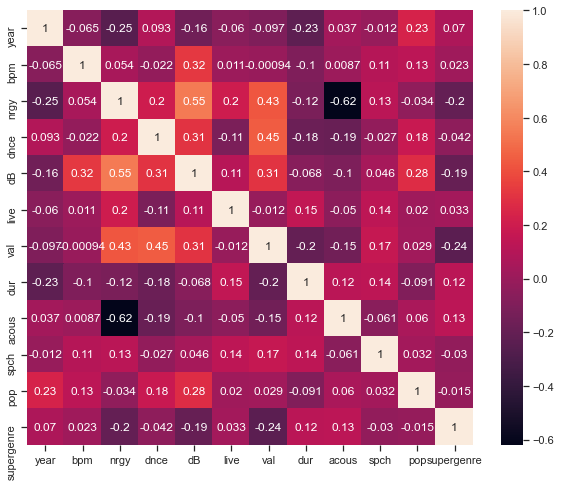

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, annot=True)

**Análise da correlação:**

* Aparentemente, algumas variáveis tem correlação muito baixa com a variável `target` (supergenre).
* Pode ser que elas não influenciem tanto na determinação da variável.
* Porém, vale testar as duas alternativas:
  * com todas as variáveis
  * sem as variáveis de menor correlação (menor que 0.01 ou que 0.05)

## Train-test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('supergenre', axis=1)
y = df.supergenre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
f'{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}'

'(121, 11), (52, 11), (121,), (52,)'

In [44]:
X_train.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
148,2013,104,78,65,-5,12,45,274,13,6,28
164,2015,130,85,58,-3,14,37,240,1,6,68
102,2019,136,40,90,-9,6,35,198,5,13,84
138,2012,92,71,56,-5,11,39,225,0,5,61
111,2017,192,73,67,-6,6,73,210,1,27,76


## Normalization

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# Fit scaler
scaler = StandardScaler()
scaler.fit(X_train)  # apply training data fitted scaler to both train and test data

# Transform data
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [47]:
np.mean(x_train).round(2), np.std(x_train)

(-0.0, 1.0)

In [292]:
print(x_train[:5, :5])
print(list(y_train[:5]))

[[-0.81 -0.48  0.49  0.22  0.22]
 [-0.01  0.42  0.84 -0.3   0.59]
 [ 1.58  0.63 -1.39  2.1  -0.53]
 [-1.2  -0.9   0.14 -0.45  0.22]
 [ 0.79  2.58  0.24  0.37  0.03]]
[8, 3, 13, 1, 4]


In [383]:
# Save model inputs as numpy arrays (.npy)
xtrain_file = 'data/003_model_inputs/xtrain.npy'
ytrain_file = 'data/003_model_inputs/ytrain.npy'
xtest_file = 'data/003_model_inputs/xtest.npy'
ytest_file = 'data/003_model_inputs/ytest.npy'

np.save(open(xtrain_file, 'wb'), x_train)
np.save(open(ytrain_file, 'wb'), np.array(le.inverse_transform(y_train)))
np.save(open(xtest_file, 'wb'), x_test)
np.save(open(ytest_file, 'wb'), np.array(le.inverse_transform(y_test)))

# Reading saved arrays
xtrain_from_file = np.load(open(xtrain_file, 'rb'), allow_pickle=True)
ytrain_from_file = np.load(open(ytrain_file, 'rb'), allow_pickle=True)
xtest_from_file = np.load(open(xtest_file, 'rb'), allow_pickle=True)
ytest_from_file = np.load(open(ytest_file, 'rb'), allow_pickle=True)

print(xtrain_from_file[:5, :5], '\n')
print(ytrain_from_file[:5])
print(le.transform(ytrain_from_file[:5]))

[[-0.81 -0.48  0.49  0.22  0.22]
 [-0.01  0.42  0.84 -0.3   0.59]
 [ 1.58  0.63 -1.39  2.1  -0.53]
 [-1.2  -0.9   0.14 -0.45  0.22]
 [ 0.79  2.58  0.24  0.37  0.03]] 

['hip hop' 'complextro' 'r&b' 'barbadian pop' 'dance']
[ 8  3 13  1  4]


In [395]:
x_train = xtrain_from_file
y_train = le.transform(ytrain_from_file)

x_test = xtest_from_file
y_test = le.transform(ytest_from_file)

## MLP Classifier

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [51]:
model = MLPClassifier(hidden_layer_sizes=(3000, 1000, 1000),
                      activation='relu',
                      solver='adam',
                      verbose=False,
                      max_iter=2000)

In [52]:
model = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 50, 50, 50, 50, 50),
                      activation='relu',
                      solver='adam',
                      verbose=False,
                      max_iter=2000)

In [396]:
model = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50),
                      activation='relu',
                      solver='sgd',
                      alpha=0.01,
                      learning_rate='constant',
                      learning_rate_init=0.05,
                      verbose=False,
                      max_iter=2000)

In [400]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.21153846153846154

In [401]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         0
           4       0.33      1.00      0.50         1
           5       0.50      0.17      0.25         6
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.33      1.00      0.50         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.17      0.25      0.20         4
          13       1.00      0.20      0.33         5
          14       0.33      0.25      0.29         4
          15       0.25      0.33      0.29         3

    accuracy                           0.21        52
   macro avg       0.22   

In [402]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Oranges):
    matriz_confusao = np.zeros((20,20))
    if not title:
        if normalize:
            title = 'Matriz de confusão normalizada'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(9,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Rótulo verdadeiro',
           xlabel='Rótulo previsto')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            matriz_confusao[i,j] = cm[i, j]
    fig.tight_layout()
    return fig,ax,matriz_confusao

Matriz de confusão normalizada


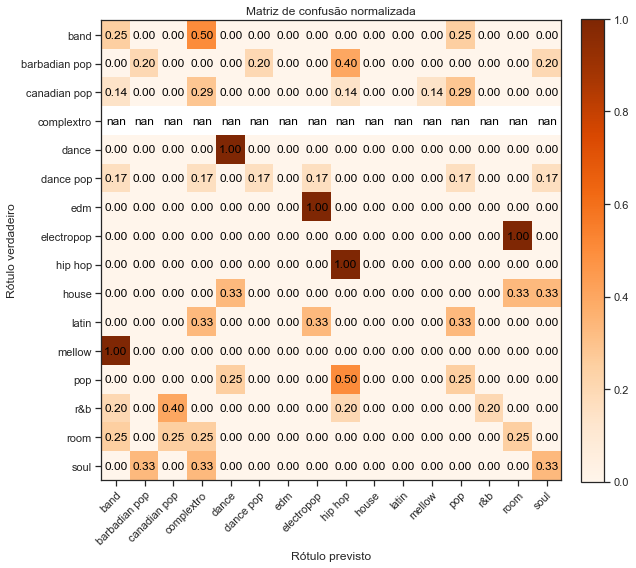

In [438]:
np.set_printoptions(precision=2)

ylabel_test = le.inverse_transform(y_test)
ylabel_pred = le.inverse_transform(y_pred)
names_classes = np.array(unique_labels(le.inverse_transform(df.supergenre)))

# Plot normalized confusion matrix
fig,ax,matriz_confusao=plot_confusion_matrix(y_test,
                                             y_pred,
                                             classes=names_classes,
                                             normalize=True)
plt.show()

# Save figure
#figname = 'figures/001conf_mat_simple.png'
#fig.savefig(figname)

In [250]:
# comparando os rótulos previsto X realizado no dataset de TESTE
df_test_pred = pd.DataFrame({'test': ylabel_test, 'pred': ylabel_pred})
df_test_pred.head()

,test,pred
0,hip hop,hip hop
1,room,band
2,canadian pop,band
3,room,complextro
4,band,dance pop


In [252]:
# rótulos que tiveram alto valor de acurácia na classe
df_test_pred[df_test_pred.test.isin(['mellow', 'electropop'])]

#df_test_pred[df_test_pred.test.isin(['complextro'])]

,test,pred
6,mellow,soul
14,electropop,electropop


In [256]:
# Saving model as pickle
import joblib

# Save the model as a pickle in a file
outfile = 'data/004_models/001mlp_simple.pkl'
joblib.dump(model, outfile)

# Load the model from the file
model_from_joblib = joblib.load(outfile)

# Use the loaded model to make predictions
model_from_joblib.predict(x_test)

array([ 8,  0,  0,  3,  5, 12, 15, 11, 14, 12,  1,  5,  0,  7,  7, 13, 13,
       14,  5,  1,  8,  0,  8, 14, 14,  5, 14,  1,  1, 15,  3,  1,  8, 14,
       14, 15, 12,  7,  4,  7,  1, 12, 10, 12,  3,  3, 14,  2,  6, 14,  7,
        1])

## Looking at correlation

In [70]:
df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,2015,120,51,83,-9,8,45,208,1,4,77,9
1,2014,76,34,68,-9,9,56,160,84,3,49,11
2,2015,120,82,57,-3,16,66,211,6,3,52,5
3,2013,121,66,60,-6,12,29,245,23,5,81,0
4,2016,142,28,59,-5,15,34,272,88,3,71,15


In [71]:
df_corr.supergenre[abs(df_corr.supergenre) < 0.1]

year    0.069830
bpm     0.022780
dnce   -0.041603
live    0.032766
spch   -0.029684
pop    -0.015456
Name: supergenre, dtype: float64

In [72]:
df_corr.supergenre[abs(df_corr.supergenre) < 0.1].index

Index(['year', 'bpm', 'dnce', 'live', 'spch', 'pop'], dtype='object')

In [73]:
df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,supergenre
0,2015,120,51,83,-9,8,45,208,1,4,77,9
1,2014,76,34,68,-9,9,56,160,84,3,49,11
2,2015,120,82,57,-3,16,66,211,6,3,52,5
3,2013,121,66,60,-6,12,29,245,23,5,81,0
4,2016,142,28,59,-5,15,34,272,88,3,71,15


In [74]:
dcorr = df.drop(['year', 'bpm', 'dnce', 'live', 'spch', 'pop'], axis=1)
Xcorr = dcorr.drop('supergenre', axis=1)
ycorr = dcorr.supergenre

Xcorr.head(3)

,nrgy,dB,val,dur,acous
0,51,-9,45,208,1
1,34,-9,56,160,84
2,82,-3,66,211,6


In [277]:
print(np.array(Xcorr)[:5], '\n')
print(np.array(le.inverse_transform(ycorr))[:5])

[[ 51  -9  45 208   1]
 [ 34  -9  56 160  84]
 [ 82  -3  66 211   6]
 [ 66  -6  29 245  23]
 [ 28  -5  34 272  88]] 

['house' 'mellow' 'dance pop' 'band' 'soul']


In [75]:
#New training

# train test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xcorr, ycorr, test_size=0.3)

# Fit scaler
scaler = StandardScaler()
scaler.fit(Xc_train)  # apply training data fitted scaler to both train and test data

# Transform data
xc_train = scaler.transform(Xc_train)
xc_test = scaler.transform(Xc_test)

In [297]:
print(xc_train[:5, :5], '\n')
print(list(yc_train[:5]))

[[-0.17  0.35 -0.53  0.03 -0.49]
 [ 0.65  0.84  0.29 -0.6  -0.45]
 [ 0.75  0.35 -0.42  0.21 -0.52]
 [ 0.24  0.84  0.65  0.35 -0.26]
 [-0.17 -0.61 -1.19 -0.02 -0.68]] 

[1, 5, 0, 1, 7]


In [293]:
# Save model inputs as numpy arrays (.npy)
xtrain_file = 'data/003_model_inputs/xtrain_corr.npy'
ytrain_file = 'data/003_model_inputs/ytrain_corr.npy'
xtest_file = 'data/003_model_inputs/xtest_corr.npy'
ytest_file = 'data/003_model_inputs/ytest_corr.npy'

np.save(open(xtrain_file, 'wb'), np.array(xc_train))
np.save(open(ytrain_file, 'wb'), np.array(le.inverse_transform(yc_train)))
np.save(open(xtest_file, 'wb'), np.array(xc_test))
np.save(open(ytest_file, 'wb'), np.array(le.inverse_transform(yc_test)))

# Reading saved arrays
xtrain_from_file = np.load(open(xtrain_file, 'rb'), allow_pickle=True)
ytrain_from_file = np.load(open(ytrain_file, 'rb'), allow_pickle=True)
xtest_from_file = np.load(open(xtest_file, 'rb'), allow_pickle=True)
ytest_from_file = np.load(open(ytest_file, 'rb'), allow_pickle=True)

print(xtrain_from_file[:5, :5], '\n')
print(ytrain_from_file[:5])
print(le.transform(ytrain_from_file[:5]))

[[-0.17  0.35 -0.53  0.03 -0.49]
 [ 0.65  0.84  0.29 -0.6  -0.45]
 [ 0.75  0.35 -0.42  0.21 -0.52]
 [ 0.24  0.84  0.65  0.35 -0.26]
 [-0.17 -0.61 -1.19 -0.02 -0.68]] 

['barbadian pop' 'dance pop' 'band' 'barbadian pop' 'electropop']
[1 5 0 1 7]


In [433]:
# Model creation
model_corr = MLPClassifier(hidden_layer_sizes=(500, ),
                           activation='relu',
                           solver='adam',
                           verbose=False,
                           max_iter=2000)

# Model fitting
model_corr.fit(xc_train, yc_train)

# Model predictions
yc_pred = model_corr.predict(xc_test)
accuracy_score(yc_test, yc_pred)

0.15384615384615385

In [420]:
# Saving model as pickle
import joblib

# Save the model as a pickle in a file
outfile = 'data/004_models/002mlp_corr.pkl'
joblib.dump(model_corr, outfile)

# Load the model from the file
model_corr_from_joblib = joblib.load(outfile)

# Use the loaded model to make predictions
model_corr_from_joblib.predict(xc_test)

array([ 2,  8,  8,  7, 12,  2, 12, 12,  9,  7,  5, 14,  4, 15,  7,  6, 12,
        1, 12, 10,  7,  1,  9, 15, 12,  5, 15,  0,  7,  1,  0,  9, 12, 10,
        7,  2, 10,  7, 14,  1,  4,  0,  2,  9,  1,  2,  4, 12,  8, 12, 12,
       11])

Matriz de confusão normalizada


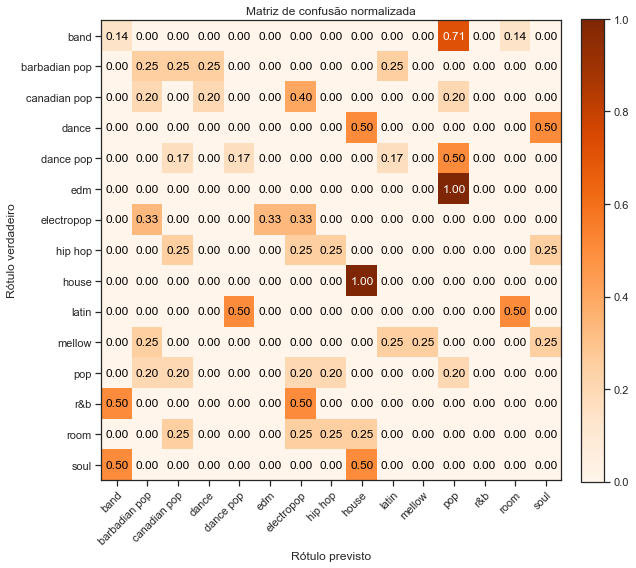

In [439]:
np.set_printoptions(precision=2)

ylabel_test = le.inverse_transform(list(yc_test))
ylabel_pred = le.inverse_transform(yc_pred)
names_classes = np.array(unique_labels(le.inverse_transform(df.supergenre)))

# Plot normalized confusion matrix
fig, ax, matriz_confusao = plot_confusion_matrix(yc_test,
                                                 yc_pred,
                                                 classes=names_classes,
                                                 normalize=True)
plt.show()

# Save figure
#figname = 'figures/002conf_mat_corr.png'
#fig.savefig(figname)

## Programatic approach

In [77]:
def run_classifier(layers, activation, xc_train, yc_train, xc_test, yc_test):
    # Model creation
    model = MLPClassifier(hidden_layer_sizes=layers,
                          activation=activation,
                          solver='adam',
                          verbose=False,
                          max_iter=2000)

    # Model fitting
    model.fit(xc_train, yc_train)

    # Model predictions
    yc_pred = model.predict(xc_test)
    
    return {'acc': accuracy_score(yc_test, yc_pred),
            'model': model}

In [78]:
run_classifier((100, 40), 'relu', xc_train, yc_train, xc_test, yc_test)

{'acc': 0.17307692307692307,
 'model': MLPClassifier(hidden_layer_sizes=(100, 40), max_iter=2000)}

In [79]:
def build_layers(nlayers, sizes):
    all_layers = []
    
    for n in nlayers:
        for size in sizes:
            all_layers.append(tuple([size]*n))
    
    return all_layers

In [80]:
nlayers = [1, 2, 3, 4, 5]
layer_size = [30, 40, 50, 100]

hidden_layers = build_layers(nlayers, layer_size)
print(f'len: {len(hidden_layers)}')
print(hidden_layers)

len: 20
[(30,), (40,), (50,), (100,), (30, 30), (40, 40), (50, 50), (100, 100), (30, 30, 30), (40, 40, 40), (50, 50, 50), (100, 100, 100), (30, 30, 30, 30), (40, 40, 40, 40), (50, 50, 50, 50), (100, 100, 100, 100), (30, 30, 30, 30, 30), (40, 40, 40, 40, 40), (50, 50, 50, 50, 50), (100, 100, 100, 100, 100)]


In [81]:
actv_func = {'logistic', 'tanh', 'relu'}  # 'identity'
all_models = []
for func in actv_func:
    for hidden in hidden_layers:
        all_models.append(run_classifier(hidden, func, xc_train, yc_train, xc_test, yc_test))

In [424]:
# change max_acc until only 1 model is left
max_acc = 0.23
best_model_prog_corr = [model for model in all_models if model['acc'] >= max_acc]
best_model_prog_corr

[{'acc': 0.23076923076923078,
  'model': MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=2000)}]

In [425]:
# Saving model as pickle
import joblib

# Save the model as a pickle in a file
outfile = 'data/004_models/003mlp_prog_corr.pkl'
joblib.dump(best_model_prog_corr[0]['model'], outfile)

# Load the model from the file
model_prog_corr_from_joblib = joblib.load(outfile)

# Use the loaded model to make predictions
model_prog_corr_from_joblib.predict(xc_test)

array([ 2,  8,  8,  2,  0,  2, 15, 12,  7,  2,  5, 14,  0, 15,  7,  7,  0,
        1, 12, 10, 13,  1,  9, 15, 14,  5, 15, 15,  7,  1,  0,  9, 12, 10,
        7,  2,  9,  7, 14,  8,  4,  0,  2,  9,  1,  2,  4, 12,  8, 13, 12,
        5])

In [436]:
yc_prog_pred = best_model_prog_corr[0]['model'].predict(xc_test)

accuracy_score(yc_test, yc_prog_pred)

0.23076923076923078

Matriz de confusão normalizada


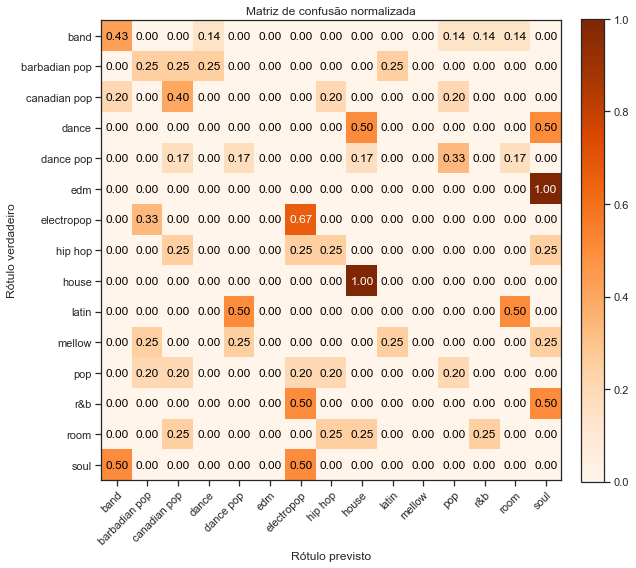

In [440]:
np.set_printoptions(precision=2)

ylabel_test = le.inverse_transform(list(yc_test))
ylabel_pred = le.inverse_transform(yc_prog_pred)
names_classes = np.array(unique_labels(le.inverse_transform(df.supergenre)))

# Plot normalized confusion matrix
fig, ax, matriz_confusao = plot_confusion_matrix(yc_test,
                                                 yc_prog_pred,
                                                 classes=names_classes,
                                                 normalize=True)
plt.show()

# Save figure
#figname = 'figures/003conf_mat_prog_corr.png'
#fig.savefig(figname)

## Hyper-parameter optimization: GridSearchCV

**How to improve my hyper-parameters?**

https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

In [117]:
print(hidden_layers, '\n')
print(hidden_layers[:10])

[(30,), (40,), (50,), (100,), (30, 30), (40, 40), (50, 50), (100, 100), (30, 30, 30), (40, 40, 40), (50, 50, 50), (100, 100, 100), (30, 30, 30, 30), (40, 40, 40, 40), (50, 50, 50, 50), (100, 100, 100, 100), (30, 30, 30, 30, 30), (40, 40, 40, 40, 40), (50, 50, 50, 50, 50), (100, 100, 100, 100, 100)] 

[(30,), (40,), (50,), (100,), (30, 30), (40, 40), (50, 50), (100, 100), (30, 30, 30), (40, 40, 40)]


In [118]:
alphas = 10.0 ** -np.arange(1, 6)
print(alphas)

iters = [1000, 1500, 2000]
print(iters)

[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]
[1000, 1500, 2000]


**From sklearn docs:**

> solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
The solver for weight optimization.
>
> ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
>
> ‘sgd’ refers to stochastic gradient descent.
>
> ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
>
> Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

In [119]:
parameter_space = {
    'hidden_layer_sizes': hidden_layers[:10],
    'activation': ['relu', 'logistic'],
    'solver': ['sgd', 'lbfgs'],
    'max_iter': iters,
    'alpha': alphas,
    'learning_rate': ['constant','adaptive'],
}

In [120]:
mlp = MLPClassifier()

In [121]:
print(f'x:\n{x_train[:3]}')
print('\n')
print(f'xc:\n{xc_train[:3]}')

x:
[[-0.81 -0.48  0.49  0.22  0.22 -0.26 -0.15  1.65 -0.25 -0.28 -2.46]
 [-0.01  0.42  0.84 -0.3   0.59 -0.06 -0.54  0.62 -0.72 -0.28  0.05]
 [ 1.58  0.63 -1.39  2.1  -0.53 -0.84 -0.63 -0.65 -0.56  0.71  1.06]]


xc:
[[-0.17  0.35 -0.53  0.03 -0.49]
 [ 0.65  0.84  0.29 -0.6  -0.45]
 [ 0.75  0.35 -0.42  0.21 -0.52]]


In [123]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, verbose=2)
# n_jobs: how many CPU cores to use from the computer (-1 for all cores available)
# cv    : number of splits for cross-validation.

clf.fit(x_train, y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 44.7min finished


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05]),
                         'hidden_layer_sizes': [(30,), (40,), (50,), (100,),
                                                (30, 30), (40, 40), (50, 50),
                                                (100, 100), (30, 30, 30),
                                                (40, 40, 40)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [1000, 1500, 2000],
                         'solver': ['sgd', 'lbfgs']},
             verbose=2)

In [414]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)
print()

y_grid_test, y_grid_pred = y_test, clf.predict(x_test)
print('acc:', accuracy_score(y_grid_test, y_grid_pred))

print()
y_grid_pred

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'max_iter': 1500, 'solver': 'sgd'}

acc: 0.23076923076923078



array([ 8,  0,  0,  0,  6, 12, 15,  0,  5,  2, 13,  0, 12,  7,  7, 13,  5,
        8,  0, 13,  8,  5,  8,  2, 14,  7,  7, 12,  1, 15,  8,  8,  8,  2,
       14, 11, 12,  7,  8,  7,  1,  8, 14,  2,  0,  6,  7, 12,  7,  2,  7,
        1])

In [346]:
# Saving model as pickle
import joblib

# Save the model as a pickle in a file
outfile = 'data/004_models/004mlp_grid_search.pkl'
joblib.dump(clf, outfile)

# Load the model from the file
model_from_joblib = joblib.load(outfile)

# Use the loaded model to make predictions
model_from_joblib.predict(x_test)

array([ 8,  0,  0,  0,  6, 12, 15,  0,  5,  2, 13,  0, 12,  7,  7, 13,  5,
        8,  0, 13,  8,  5,  8,  2, 14,  7,  7, 12,  1, 15,  8,  8,  8,  2,
       14, 11, 12,  7,  8,  7,  1,  8, 14,  2,  0,  6,  7, 12,  7,  2,  7,
        1])

In [415]:
print('Results on the test set:')
print(classification_report(y_grid_test, y_grid_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           5       0.67      0.33      0.44         6
           6       0.00      0.00      0.00         2
           7       0.11      1.00      0.20         1
           8       0.33      1.00      0.50         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.20      0.25      0.22         4
          13       0.67      0.40      0.50         5
          14       0.00      0.00      0.00         4
          15       0.50      0.33      0.40         3

    accuracy                           0.23        52
   macro avg       0.21      0.25      0.18        52
w

Matriz de confusão normalizada


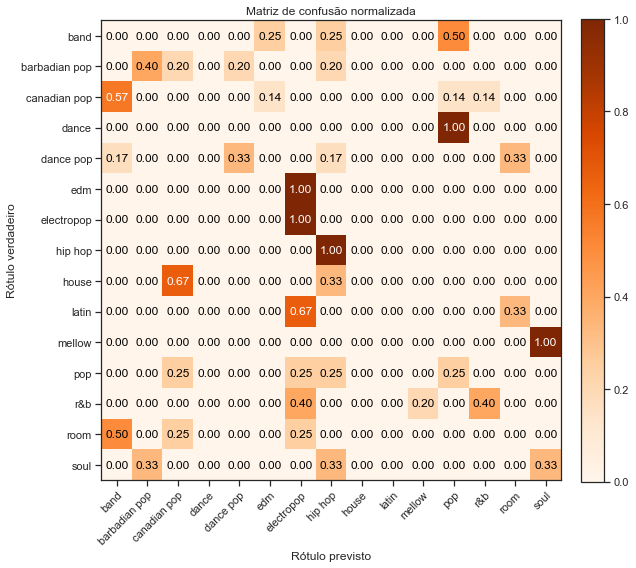

In [441]:
np.set_printoptions(precision=2)

ylabel_test = le.inverse_transform(list(y_grid_test))
ylabel_pred = le.inverse_transform(y_grid_pred)
names_classes = np.array(unique_labels(le.inverse_transform(df.supergenre)))

# Plot normalized confusion matrix
fig, ax, matriz_confusao = plot_confusion_matrix(y_grid_test,
                                                 y_grid_pred,
                                                 classes=names_classes,
                                                 normalize=True)
plt.show()

# Save figure
#figname = 'figures/004conf_mat_grid_search.png'
#fig.savefig(figname)